In [10]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [50]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

In [51]:
# loading dataset into Pandas DataFrame
df = pd.read_csv(url
                 , names=['sepal length','sepal width','petal length','petal width','target'])

In [52]:
df.head()

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [53]:
features = ['sepal length', 'sepal width', 'petal length', 'petal width']
x = df.loc[:, features].values

In [54]:
y = df.loc[:,['target']].values

In [55]:
x = StandardScaler().fit_transform(x)

In [56]:
pd.DataFrame(data = x, columns = features).head()

,sepal length,sepal width,petal length,petal width
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


In [80]:
pca = PCA(n_components=4)

In [81]:
principalComponents = pca.fit_transform(x)

In [82]:
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2', 'principal component 3', 'principal component 4'])

In [83]:
principalDf.head()

,principal component 1,principal component 2,principal component 3,principal component 4
0,-2.264542,0.505704,-0.121943,-0.023073
1,-2.086426,-0.655405,-0.227251,-0.103208
2,-2.367950,-0.318477,0.051480,-0.027825
3,-2.304197,-0.575368,0.098860,0.066311
4,-2.388777,0.674767,0.021428,0.037397


In [84]:
pca.explained_variance_ratio_

array([ 0.72770452,  0.23030523,  0.03683832,  0.00515193])

In [85]:
pca = PCA(n_components=2)

In [86]:
principalComponents = pca.fit_transform(x)

In [87]:
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [88]:
principalDf.head()

,principal component 1,principal component 2
0,-2.264542,0.505704
1,-2.086426,-0.655405
2,-2.367950,-0.318477
3,-2.304197,-0.575368
4,-2.388777,0.674767


In [89]:
pca.explained_variance_ratio_

array([ 0.72770452,  0.23030523])

In [90]:
finalDf = pd.concat([principalDf, df[['target']]], axis = 1)


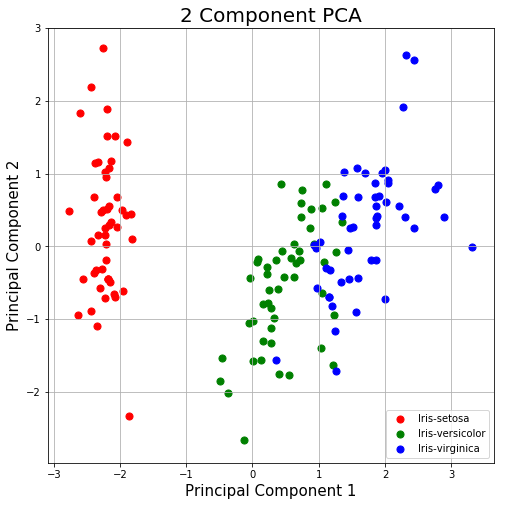

In [91]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)


targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()


In [11]:
# Eating, exercise habbit and their body shape
df = pd.DataFrame(columns=['calory', 'breakfast', 'lunch', 'dinner', 'exercise', 'body_shape'])
df.loc[0] = [1200, 1, 0, 0, 2, 'Skinny']
df.loc[1] = [2800, 1, 1, 1, 1, 'Normal']
df.loc[2] = [3500, 2, 2, 1, 0, 'Fat']
df.loc[3] = [1400, 0, 1, 0, 3, 'Skinny']
df.loc[4] = [5000, 2, 2, 2, 0, 'Fat']
df.loc[5] = [1300, 0, 0, 1, 2, 'Skinny']
df.loc[6] = [3000, 1, 0, 1, 1, 'Normal']
df.loc[7] = [4000, 2, 2, 2, 0, 'Fat']
df.loc[8] = [2600, 0, 2, 0, 0, 'Normal']
df.loc[9] = [3000, 1, 2, 1, 1, 'Fat']

In [12]:
df.head(10)

,calory,breakfast,lunch,dinner,exercise,body_shape
0,1200,1,0,0,2,Skinny
1,2800,1,1,1,1,Normal
2,3500,2,2,1,0,Fat
3,1400,0,1,0,3,Skinny
4,5000,2,2,2,0,Fat
5,1300,0,0,1,2,Skinny
6,3000,1,0,1,1,Normal
7,4000,2,2,2,0,Fat
8,2600,0,2,0,0,Normal
9,3000,1,2,1,1,Fat


In [13]:
# X is feature vectors
X = df[['calory', 'breakfast', 'lunch', 'dinner', 'exercise']]
# Y is labels
Y = df[['body_shape']]

In [14]:
x_std = StandardScaler().fit_transform(X)

In [15]:
x_std

array([[-1.35205803,  0.        , -1.3764944 , -1.28571429,  1.        ],
       [ 0.01711466,  0.        , -0.22941573,  0.14285714,  0.        ],
       [ 0.61612771,  1.29099445,  0.91766294,  0.14285714, -1.        ],
       [-1.18091145, -1.29099445, -0.22941573, -1.28571429,  2.        ],
       [ 1.89972711,  1.29099445,  0.91766294,  1.57142857, -1.        ],
       [-1.26648474, -1.29099445, -1.3764944 ,  0.14285714,  1.        ],
       [ 0.18826125,  0.        , -1.3764944 ,  0.14285714,  0.        ],
       [ 1.04399418,  1.29099445,  0.91766294,  1.57142857, -1.        ],
       [-0.15403193, -1.29099445,  0.91766294, -1.28571429, -1.        ],
       [ 0.18826125,  0.        ,  0.91766294,  0.14285714,  0.        ]])

In [16]:
# features are columns from x_std
features = x_std.T 
covariance_matrix = np.cov(features)
print(covariance_matrix)

[[ 1.11111111  0.88379717  0.76782385  0.89376551 -0.93179808]
 [ 0.88379717  1.11111111  0.49362406  0.81967902 -0.71721914]
 [ 0.76782385  0.49362406  1.11111111  0.40056715 -0.76471911]
 [ 0.89376551  0.81967902  0.40056715  1.11111111 -0.63492063]
 [-0.93179808 -0.71721914 -0.76471911 -0.63492063  1.11111111]]


In [17]:
covariance_matrix2 = np.cov(x_std.T)
print(covariance_matrix2)

[[ 1.11111111  0.88379717  0.76782385  0.89376551 -0.93179808]
 [ 0.88379717  1.11111111  0.49362406  0.81967902 -0.71721914]
 [ 0.76782385  0.49362406  1.11111111  0.40056715 -0.76471911]
 [ 0.89376551  0.81967902  0.40056715  1.11111111 -0.63492063]
 [-0.93179808 -0.71721914 -0.76471911 -0.63492063  1.11111111]]


In [18]:
eig_vals, eig_vecs = np.linalg.eig(covariance_matrix)
print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[ 0.508005    0.0169937  -0.84711404  0.11637853  0.10244985]
 [ 0.44660335  0.36890361  0.12808055 -0.63112016 -0.49973822]
 [ 0.38377913 -0.70804084  0.20681005 -0.40305226  0.38232213]
 [ 0.42845209  0.53194699  0.3694462   0.22228235  0.58954327]
 [-0.46002038  0.2816592  -0.29450345 -0.61341895  0.49601841]]

Eigenvalues 
[ 4.0657343   0.8387565   0.07629538  0.27758568  0.2971837 ]


In [19]:
# We reduce dimension to 1 dimension, since 1 eigenvector has 73% (enough) variances
eig_vals[0] / sum(eig_vals)

0.73183217314275439

In [20]:
projected_X = x_std.dot(eig_vecs.T[0])
projected_X

array([-2.22600943, -0.0181432 ,  1.76296611, -2.73542407,  3.02711544,
       -2.14702579, -0.37142473,  2.59239883, -0.39347815,  0.50902498])

In [21]:
result=pd.DataFrame(projected_X,columns=['PC1'])
result['y-axis']=0.0
result['label']=Y
result.head()

,PC1,y-axis,label
0,-2.226009,0.0,Skinny
1,-0.018143,0.0,Normal
2,1.762966,0.0,Fat
3,-2.735424,0.0,Skinny
4,3.027115,0.0,Fat


In [22]:
import seaborn as sns
%matplotlib inline

Text(0.5,1,'PCA result')

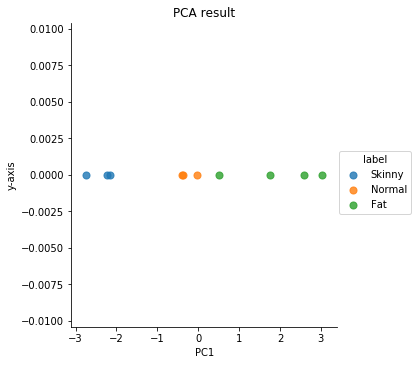

In [24]:
sns.lmplot('PC1', 'y-axis', data=result, fit_reg=False,  # x-axis, y-axis, data, no line
           scatter_kws={"s": 50}, # marker size
           hue="label") # color

# title
plt.title('PCA result')

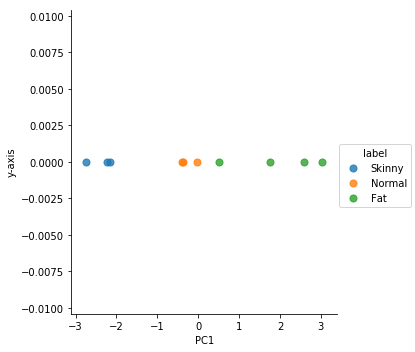

In [25]:
pca = PCA(n_components=1)
sklearn_pca_x = pca.fit_transform(x_std)
sklearn_result = pd.DataFrame(sklearn_pca_x, columns=['PC1'])
sklearn_result['y-axis'] = 0.0
sklearn_result['label'] = Y

sns.lmplot('PC1', 'y-axis', data=sklearn_result, fit_reg=False,  # x-axis, y-axis, data, no line
           scatter_kws={"s": 50}, # marker size
           hue="label") # color